# 1.Contents : WordCloud (뉴스 키워드 : 댕댕여행, 애완견여행, 애완동물여행)
# 2. 라이브러리 가져오기

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import re
import soynlp
sns.set_style('whitegrid', {'grid.linestyle':'--'})
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import datetime as dt
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [3]:
pd.options.display.max_columns=None

# 3.데이터 불러오기(반려동물여행관련 뉴스)

In [4]:
path = glob.glob('./data/네이버api/*.*')
for i in range(len(path)):
    print(i, path[i])

0 ./data/네이버api\naver_애완동물_news_title_year.csv
1 ./data/네이버api\news_(0628)naver_댕댕.csv
2 ./data/네이버api\news_(0628)naver_댕댕트립.csv
3 ./data/네이버api\news_(0628)naver_반려견_여행.csv
4 ./data/네이버api\news_(0628)naver_반려동물.csv
5 ./data/네이버api\news_(0628)naver_애완견.csv
6 ./data/네이버api\news_(0628)naver_애완동물_여행.csv
7 ./data/네이버api\블로그_(0623)naver_댕댕.csv
8 ./data/네이버api\블로그_(0627)naver_댕댕.csv
9 ./data/네이버api\블로그_(0627)naver_댕댕_여행.csv
10 ./data/네이버api\블로그_(0627)naver_반려동물.csv
11 ./data/네이버api\블로그_(0627)naver_애완견.csv
12 ./data/네이버api\블로그_(0627)naver_애완견_여행.csv
13 ./data/네이버api\블로그_(0627)naver_애완동물.csv
14 ./data/네이버api\블로그_(0627)naver_애완동물_여행.csv


In [5]:
df1 = pd.read_csv(path[2], encoding = 'utf-8', index_col = 0)# 댕댕트립
df2 = pd.read_csv(path[3], encoding = 'utf-8', index_col = 0)# 반려견_여행
df3 = pd.read_csv(path[6], encoding = 'utf-8', index_col = 0)# 애완동물_여행

In [6]:
df = pd.concat([df1, df2, df3])
df

,Title,년
0,"한국관광공사, 댕댕트레킹과 연계한 ‘댕댕트립’ 프로그램 5월 21일 실시",2022
1,'반려동물과 동반 여행 떠나요' 한국관광공사 '댕댕트립' 실시,2022
2,"한국관광공사, 반려동물 동반여행사업 본격화…“댕댕트립 떠나요”",2022
3,"한국관광공사, 반려동물 함께 하는 '댕댕트립' 활성화",2022
4,“눈치 보지 말고 ‘댕댕트립’ 떠나세요”,2022
...,...,...
995,"여행의 기원, 갈라파고스",2018
996,반려동물이 죽어서 너무 슬퍼요- 펫로스 증후군,2018
997,여행 필수템만 담아 … `캐리어 다이어트`로 가볍게 떠나자,2018
998,"‘댕댕트립’ 문정희X강예원X로버트 할리, 반려견과의 여행...“어렵지 않아요...",2018


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   2677 non-null   object
 1   년       2677 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.7+ KB


# 4. EDA

In [8]:
df.groupby('년')['Title'].count()

년
1993      2
1994      1
2000      1
2002      8
2003     20
2004     25
2005     14
2006     12
2007     16
2008     15
2009     13
2010      8
2011     33
2012     21
2013     46
2014     27
2015    143
2016     43
2017     65
2018    485
2019    371
2020    130
2021    532
2022    646
Name: Title, dtype: int64

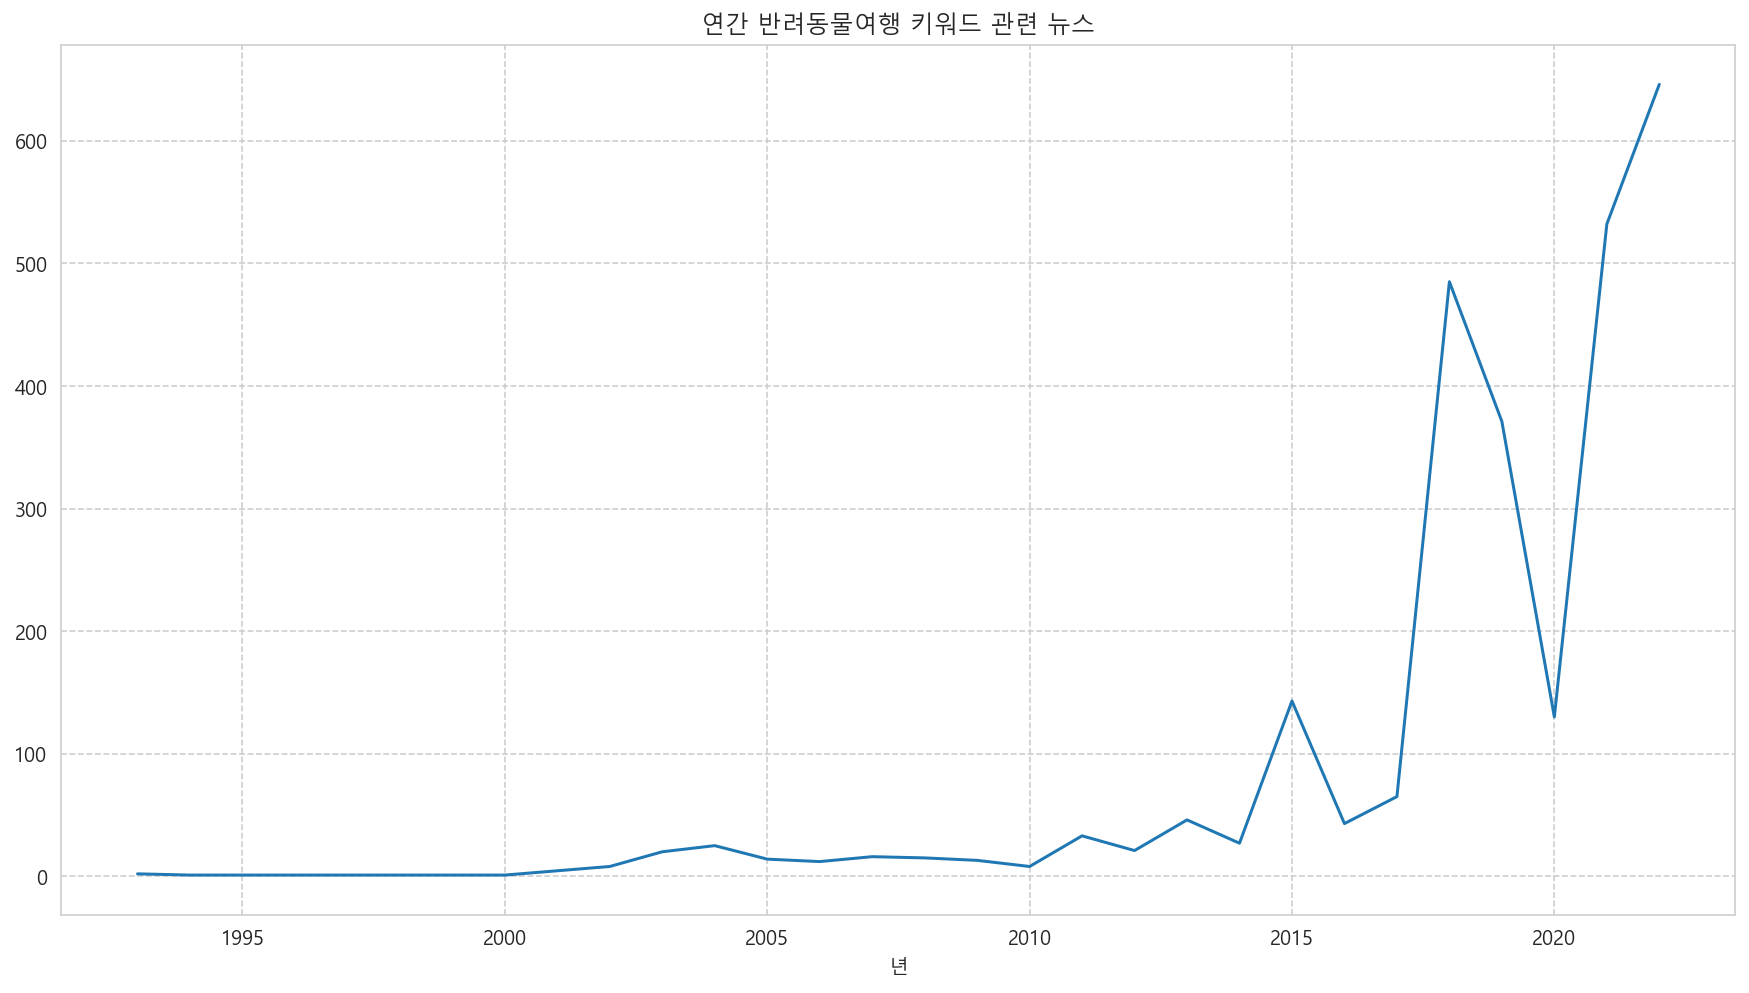

In [9]:
plt.figure(figsize = (15,8))
df.groupby('년')['Title'].count().plot()
plt.title('연간 반려동물여행 키워드 관련 뉴스')
plt.show()

# 6. WordCloud
## (1) 명사추출

In [10]:
from soynlp.noun import LRNounExtractor

In [11]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(df['Title'])
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (1764, 1066) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 179 nouns are extracted
Wall time: 186 ms


In [12]:
nouns

{'추진': NounScore_v1(frequency=13, score=0.99972, known_r_ratio=0.5),
 '행복': NounScore_v1(frequency=28, score=0.9962549199999999, known_r_ratio=0.9615384615384616),
 '시크': NounScore_v1(frequency=5, score=1.0, known_r_ratio=0.25),
 '카드': NounScore_v1(frequency=10, score=0.75277425, known_r_ratio=1.0),
 '사회': NounScore_v1(frequency=4, score=0.99883, known_r_ratio=0.3333333333333333),
 '시작': NounScore_v1(frequency=16, score=0.9946315, known_r_ratio=1.0),
 '장흥': NounScore_v1(frequency=9, score=0.5042612500000001, known_r_ratio=1.0),
 '마음': NounScore_v1(frequency=13, score=0.997693, known_r_ratio=1.0),
 '맞이': NounScore_v1(frequency=17, score=0.976362, known_r_ratio=1.0),
 '캠핑': NounScore_v1(frequency=11, score=0.9960990000000001, known_r_ratio=0.2857142857142857),
 '소녀': NounScore_v1(frequency=7, score=0.999867, known_r_ratio=0.14285714285714285),
 '맛집': NounScore_v1(frequency=14, score=0.9999083333333333, known_r_ratio=1.0),
 '경북': NounScore_v1(frequency=18, score=0.6292475, known_r_ratio=0

In [13]:
def preprocess(text):
    text = re.sub('\\\\n', ' ', text)
    return text

df_noun = df['Title'].apply(preprocess)

In [14]:
df_noun

0            한국관광공사, 댕댕트레킹과 연계한 ‘댕댕트립’ 프로그램 5월 21일 실시
1                  '반려동물과 동반 여행 떠나요' 한국관광공사 '댕댕트립' 실시
2                  한국관광공사, 반려동물 동반여행사업 본격화…“댕댕트립 떠나요”
3                       한국관광공사, 반려동물 함께 하는 '댕댕트립' 활성화
4                              “눈치 보지 말고 ‘댕댕트립’ 떠나세요”
                            ...                      
995                                     여행의 기원, 갈라파고스
996                         반려동물이 죽어서 너무 슬퍼요- 펫로스 증후군
997                  여행 필수템만 담아 … `캐리어 다이어트`로 가볍게 떠나자
998     ‘댕댕트립’ 문정희X강예원X로버트 할리, 반려견과의 여행...“어렵지 않아요...
999    [국내기차여행] 맛집으로 유명한 통영, 가볼만한 곳도 많아…통영 1박 2일 여...
Name: Title, Length: 2677, dtype: object

In [15]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [16]:
fontpath = "C:\Windows\Fonts\malgun.ttf"

In [27]:
#불용어 설정
stopwords_kr = ['여행','애완동물','애완견', 'quot','lt', '반려견','반려동물', '애견', '강아지', '댕댕', 
                '애견수제간식', '수제간식', 'gt', 'amp', '반려동물 수제간식', '강아지케이크', '강아지수제간식'
               , '애완견과', '함께하는', '동반', '애완동물과', '수 있는', '함께', '애완견을', '포토'
               '애완 동물', '고양이', '애완견분양', '애완견이', '애완견의', '로버트 할리', '문정희'
               , '애완견간식', '분양', '애완견은', '반려견과', '댕댕아', '로버트할리', '강예원', '반려동물과']

In [19]:
from wordcloud import WordCloud

Wall time: 0 ns


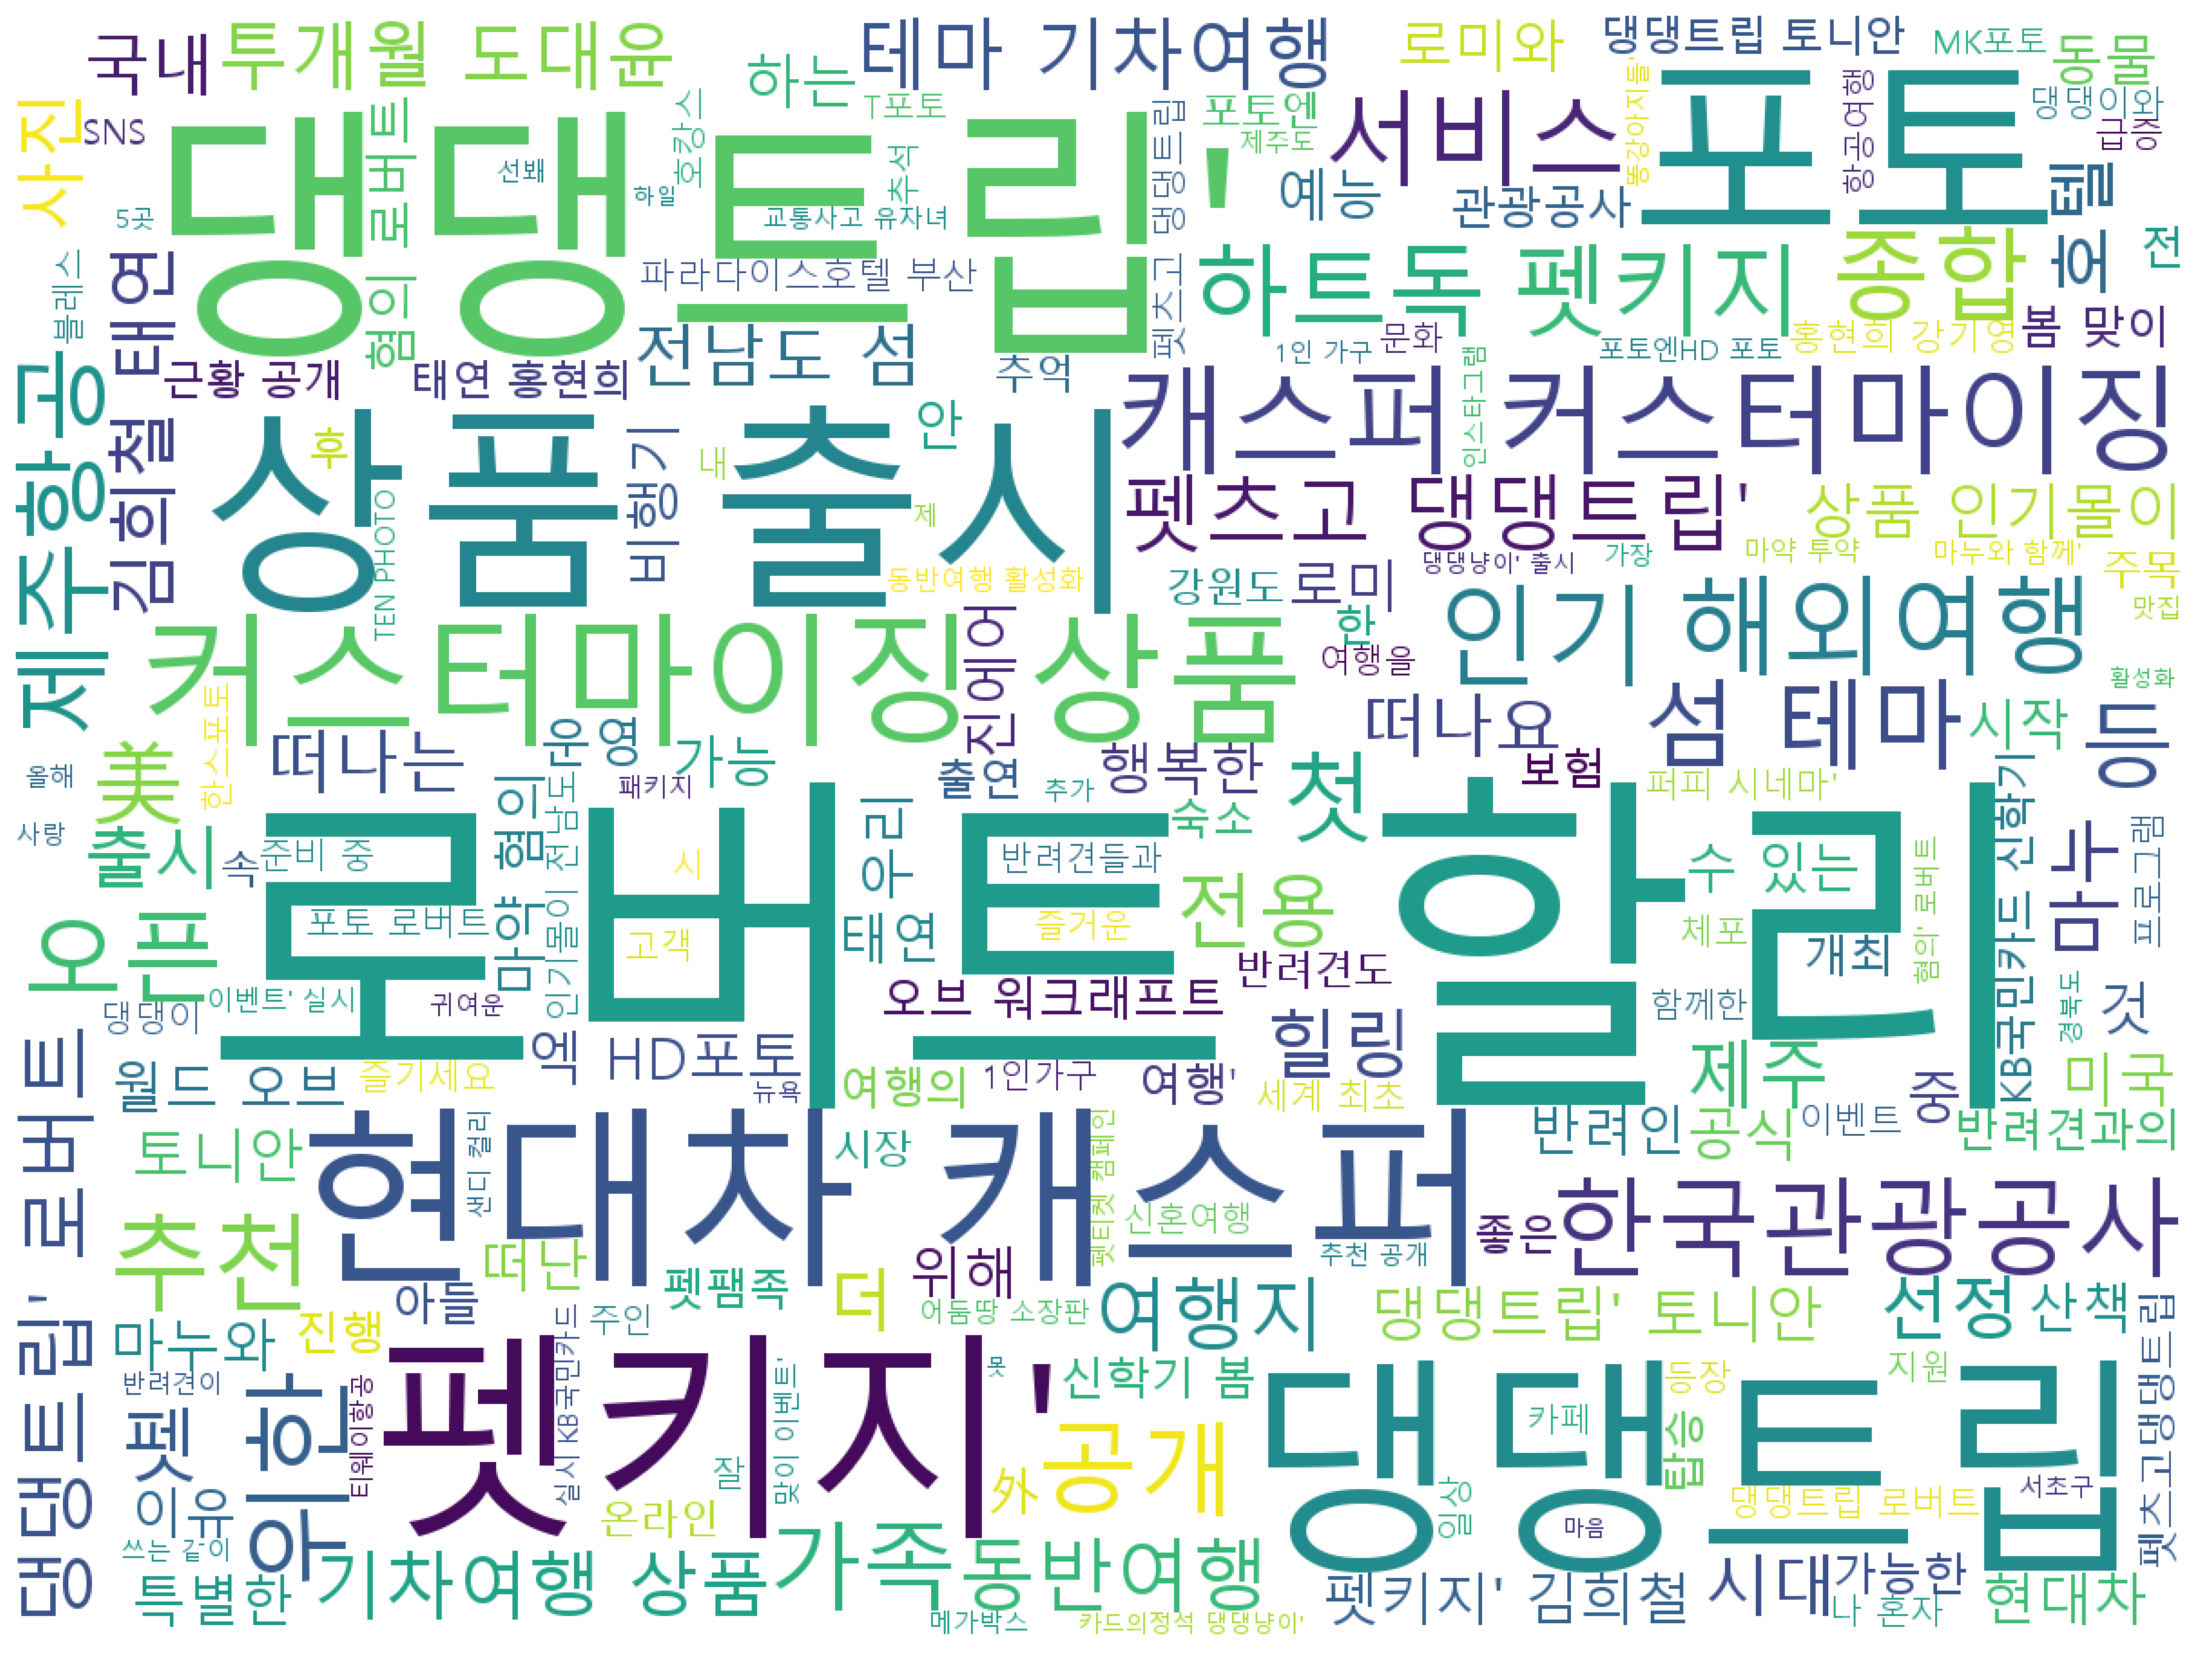

In [28]:
%time 
dang_trip_cloud = displayWordCloud(' '.join(df_noun))
dang_trip_cloud